###DNN CT3 Assignment

Section A: Question No:1 (15 marks)
Build a Convolution Neural Network to classify 6 different species of Butterfly images.

Dataset_Folder Name: Butterflies_classification_dataset

Conditions to consider

Parameters should not cross 300000

Should not use more than 4 layers (except input and output, including convolution and dense layers)

Use Adam Optimizer



In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, GlobalAveragePooling2D, Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [2]:
import matplotlib.pyplot as plt
from keras import layers, models

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
train_data="/content/drive/MyDrive/assignment datasets/DNN assignment/train"
test_data="/content/drive/MyDrive/assignment datasets/DNN assignment/test"

In [5]:
# train dataset

dataset_train = '/content/drive/MyDrive/assignment datasets/DNN assignment/train'
data_butterfly_folders = os.listdir(dataset_train)
data_butterfly_Train = [os.path.join(dataset_train, path) for path in data_butterfly_folders]

In [6]:
# test dataset

dataset_test = '/content/drive/MyDrive/assignment datasets/DNN assignment/test'
data_butterfly_folders = os.listdir(dataset_test)
data_butterfly_Test = [os.path.join(dataset_test, path) for path in data_butterfly_folders]

In [7]:
data_butterfly_Train

['/content/drive/MyDrive/assignment datasets/DNN assignment/train/gold banded',
 '/content/drive/MyDrive/assignment datasets/DNN assignment/train/metalmark',
 '/content/drive/MyDrive/assignment datasets/DNN assignment/train/zebra long wing',
 '/content/drive/MyDrive/assignment datasets/DNN assignment/train/copper tail',
 '/content/drive/MyDrive/assignment datasets/DNN assignment/train/indra swallow',
 '/content/drive/MyDrive/assignment datasets/DNN assignment/train/sootywing']

In [8]:
data_butterfly_Test

['/content/drive/MyDrive/assignment datasets/DNN assignment/test/gold banded',
 '/content/drive/MyDrive/assignment datasets/DNN assignment/test/zebra long wing',
 '/content/drive/MyDrive/assignment datasets/DNN assignment/test/copper tail',
 '/content/drive/MyDrive/assignment datasets/DNN assignment/test/sootywing',
 '/content/drive/MyDrive/assignment datasets/DNN assignment/test/indra swallow',
 '/content/drive/MyDrive/assignment datasets/DNN assignment/test/metalmark']

In [9]:
def plot_imgs(item_dir, title=" ", num_imgs=4, cmap='viridis'):
    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:num_imgs]

    plt.figure(figsize=(15, 15))
    for idx, img_path in enumerate(item_files):
        plt.subplot(8, 8, idx+1)
        img = plt.imread(img_path, 0)
        plt.title(title)
        plt.imshow(img, cmap=cmap)

    plt.tight_layout()

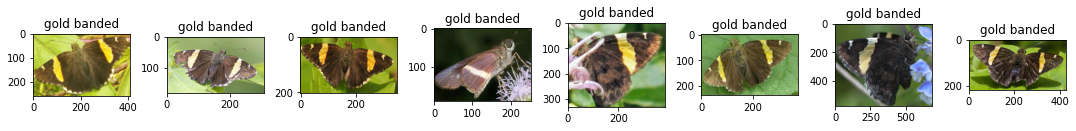

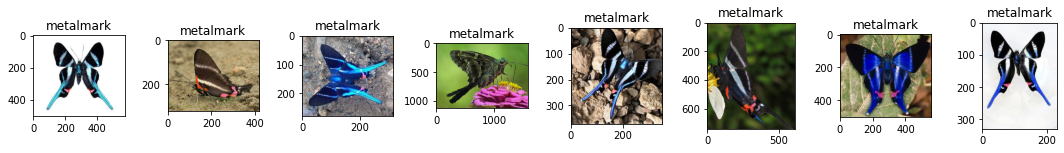

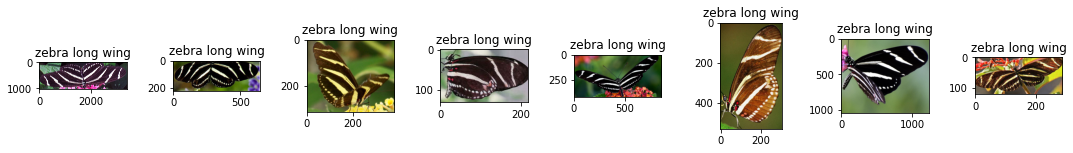

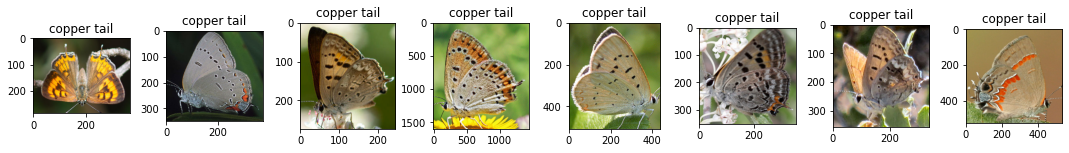

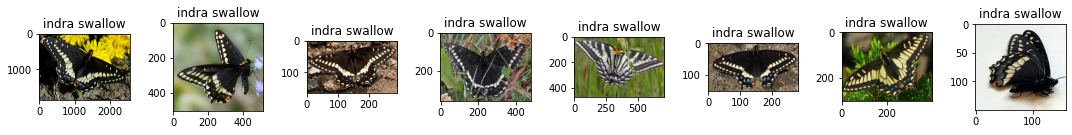

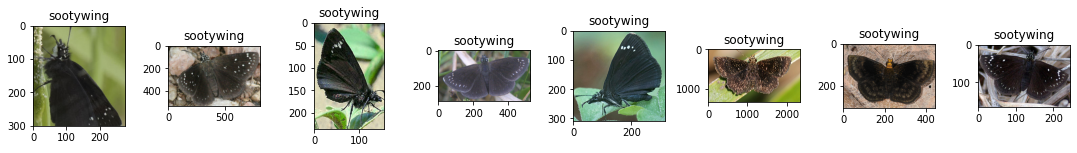

In [10]:
for path in data_butterfly_Train:
    head, tail = os.path.split(path)
    plot_imgs(path, tail, 8)

In [11]:
butterfly_dic = {}
for path in data_butterfly_Test:
    head, tail = os.path.split(path)
    butterfly_dic[tail] = len(os.listdir(path))

In [12]:
label_list = ["{}: {}".format(key, butterfly_dic[key]) for key in butterfly_dic]

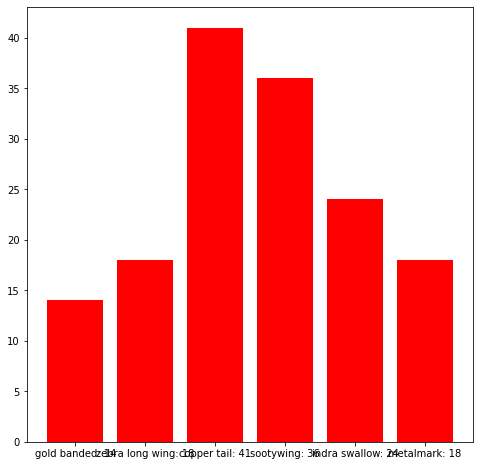

In [13]:
plt.figure(figsize=(8, 8))
plt.bar(range(len(butterfly_dic)), list(butterfly_dic.values()), color="red")
plt.xticks(range(len(butterfly_dic)), list(label_list))
plt.show();

In [14]:
img_size_h = 100
img_size_w = 100
input_shape = (img_size_h, img_size_w, 1)
batch_size = 1

In [15]:
model = Sequential([

    Conv2D(16, (5,5), input_shape=input_shape, activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(32, (5,5), padding='same', activation='relu'),
    MaxPool2D((2,2)),
    Flatten(),
    Dense(6, activation='softmax'),    
])

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 6)                 1

In [17]:
train_dataaugm = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.3,
    rotation_range=30,
    width_shift_range=0.6,
    height_shift_range=0.6,
    shear_range=3, 
    zoom_range=50,
    horizontal_flip=True,
    vertical_flip=True)

In [18]:
train_gen = train_dataaugm.flow_from_directory(
    '/content/drive/MyDrive/assignment datasets/DNN assignment/train',
    target_size=(img_size_h, img_size_w),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True, 
    seed=8)

Found 336 images belonging to 6 classes.


In [19]:
validation_gen = train_dataaugm.flow_from_directory(
    '/content/drive/MyDrive/assignment datasets/DNN assignment/test',
    target_size=(img_size_h, img_size_w),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True,
    seed=7)

Found 43 images belonging to 6 classes.


In [20]:
history = model.fit_generator(
    train_gen,
    epochs=20,
    validation_data=(validation_gen),
    )

<ipython-input-20-d19dd40fbfee>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/20
336/336 [==============================] - 90s 264ms/step - loss: 1.8039 - accuracy: 0.1310 - val_loss: 1.7910 - val_accuracy: 0.2791
Epoch 2/20
336/336 [==============================] - 11s 33ms/step - loss: 1.8118 - accuracy: 0.1548 - val_loss: 1.7921 - val_accuracy: 0.1163
Epoch 3/20
336/336 [==============================] - 11s 32ms/step - loss: 1.8042 - accuracy: 0.1429 - val_loss: 1.7925 - val_accuracy: 0.1628
Epoch 4/20
336/336 [==============================] - 12s 36ms/step - loss: 1.8096 - accuracy: 0.1696 - val_loss: 1.7929 - val_accuracy: 0.1163
Epoch 5/20
336/336 [==============================] - 11s 33ms/step - loss: 1.8408 - accuracy: 0.1875 - val_loss: 1.8022 - val_accuracy: 0.1163
Epoch 6/20
336/336 [==============================] - 11s 32ms/step - loss: 1.7978 - accuracy: 0.1726 - val_loss: 1.7859 - val_accuracy: 0.1395
Epoch 7/20
336/336 [==============================] - 11s 32ms/step - loss: 1.7911 - accuracy: 0.1607 - val_loss: 2.1567 - val_accuracy

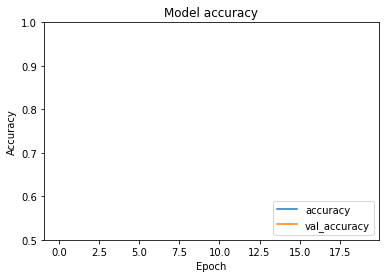

43/43 - 2s - loss: 1.7911 - accuracy: 0.2791 - 2s/epoch - 49ms/step


In [22]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()


test_loss, test_acc = model.evaluate(validation_gen, verbose=2)

In [23]:
print(test_acc)

0.27906978130340576


Section A: Question No:2 (15 marks)
Improve the baseline model performance and save the weights of improved model

Conditions to consider

Apply Data Augmentation if required

No parameter limit

Can use any number of layers

Use any optimizers of your choice

Save the best model and apply early callback

In [ ]:
    # model = Sequential()
    # model.add(Conv2D(32, kernel_size=(3, 3),
    #                  activation='relu',
    #                  input_shape=input_shape))
    # model.add(Conv2D(64, (3, 3), activation='relu'))
    # model.add(MaxPoolD(pool_size=(2, 2)))
    # model.add(Dropout(0.25))
    # model.add(Flatten())
    # model.add(Dense(128, activation='relu'))
    # model.add(Dropout(0.5))
    # model.add(Dense(NUM_CLASSES, activation='softmax'))

In [24]:
model_new = Sequential([

      Conv2D(16, (5,5), input_shape=input_shape, activation='relu'),
      MaxPool2D((2, 2)),
      Conv2D(32, (5,5), padding='same', activation='relu'),
      MaxPool2D((2,2)),
      Conv2D(64, (5,5), padding='same', activation='relu'),
      MaxPool2D((2,2)),
      Dropout(0.5),
      Flatten(),
      Dense(128, activation='relu'),
      Dropout(0.5),
      Dense(6, activation='softmax'),    
])

In [25]:
model_new.compile(optimizer='Adamax', loss='categorical_crossentropy', metrics=['accuracy'])
model_new.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 96, 96, 16)        416       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 48, 48, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 48, 48, 32)        12832     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        51264     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 64)      

In [26]:
# Defining callbacks

filepath = './final_model_weights.hdf5'

earlystopping = EarlyStopping(monitor = 'val_auc', 
                              mode = 'max' , 
                              patience = 5,
                              verbose = 1)

checkpoint = ModelCheckpoint(filepath, 
                                monitor = 'val_auc', 
                                mode='max', 
                                save_best_only=True, 
                                verbose = 1)


callback_list = [earlystopping, checkpoint]

In [27]:
early_stop=EarlyStopping(monitor='val_loss',patience=7)

In [29]:
history_new = model_new.fit_generator(
    train_gen,
    epochs=50,
    validation_data=(validation_gen),
    callbacks=[early_stop]
)

Epoch 1/50


<ipython-input-29-e93f2c7571ad>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_new = model_new.fit_generator(


336/336 [==============================] - 15s 43ms/step - loss: 1.8008 - accuracy: 0.1131 - val_loss: 1.7853 - val_accuracy: 0.2326
Epoch 2/50
336/336 [==============================] - 17s 51ms/step - loss: 1.7936 - accuracy: 0.1458 - val_loss: 1.7915 - val_accuracy: 0.1628
Epoch 3/50
336/336 [==============================] - 16s 46ms/step - loss: 1.7936 - accuracy: 0.1607 - val_loss: 1.7904 - val_accuracy: 0.2093
Epoch 4/50
336/336 [==============================] - 16s 47ms/step - loss: 1.7910 - accuracy: 0.1905 - val_loss: 1.7906 - val_accuracy: 0.1163
Epoch 5/50
336/336 [==============================] - 21s 63ms/step - loss: 1.7925 - accuracy: 0.1875 - val_loss: 1.7873 - val_accuracy: 0.1628
Epoch 6/50
336/336 [==============================] - 14s 43ms/step - loss: 1.7924 - accuracy: 0.1756 - val_loss: 1.7802 - val_accuracy: 0.1860
Epoch 7/50
336/336 [==============================] - 15s 43ms/step - loss: 1.7880 - accuracy: 0.1310 - val_loss: 1.7846 - val_accuracy: 0.2093
Epo

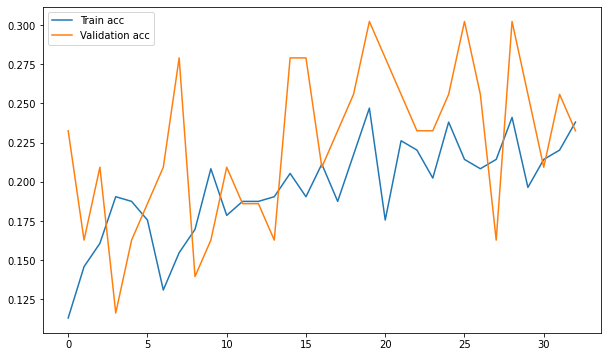

In [30]:
plt.figure(figsize=[10,6])
plt.plot(history_new.history["accuracy"], label = "Train acc")
plt.plot(history_new.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

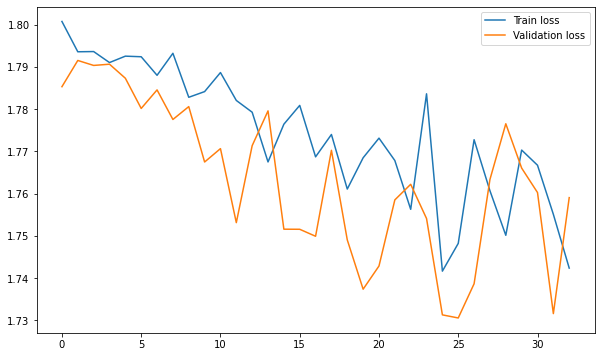

In [31]:
plt.figure(figsize=(10,6))
plt.plot(history_new.history['loss'], label = "Train loss")
plt.plot(history_new.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

In [32]:
model.save("/content/drive/MyDrive/assignment datasets/new model.h5")
print("Saved model to disk")

Saved model to disk
